<div style="display: flex; gap: 10px;">
  <img src="../images/HOOPS_AI.jpg" style="width: 20%;">
   

# Use the Dataset Explorer to navigate the dataset


The `dataset` module provides objects for exploring, navigating, and loading CAD encoded datasets for machine learning applications. It consists of two primary components that work together to simplify data handling:

1. **DatasetExplorer** - For exploring and querying dataset contents
2. **DatasetLoader** - For loading and preparing datasets for machine learning training

These components are designed to work with the processed data from the `cadaccess` and `cadencoder` modules, as well as the outputs from the flow pipeline system. They provide high-level abstractions that allow users to focus on machine learning tasks rather than data handling complexities.

## DatasetExplorer

The `DatasetExplorer` class (`dataset_explorer.py`) provides methods for exploring and querying datasets stored in copressed and optimized format (.dataset) with accompanying metadata (.infoset) in files. This class focuses on data discovery, filtering, and statistical analysis.

### Key Methods

#### Data Discovery and Metadata

- `available_groups() -> set`: Returns the set of available dataset groups (faces, edges, file, etc.)
- `get_descriptions(table_name: str, key_id: Optional[int] = None, use_wildchar: Optional[bool] = False) -> pd.DataFrame`: Retrieves metadata descriptions (labels, face types, edge types, etc.)
- `get_parquet_info_by_code(file_id_code: int)`: Returns rows from the Parquet file for a specific file ID code
- `get_file_info_all() -> pd.DataFrame`: Returns all file info from the Parquet metadata

#### Data Distribution Analysis

- `create_distribution(key: str, bins: int = 10, group: str = "faces") -> Dict[str, Any]`: Computes histograms of data distributions using Dask for parallel processing

#### Data Filtering and Selection

- `get_file_list(group: str, where: Callable[[xr.Dataset], xr.DataArray]) -> List[str]`: Returns file IDs matching a boolean filter condition
- `file_dataset(file_id_code: int, group: str) -> xr.Dataset`: Returns a subset of the dataset for a specific file
- `build_membership_matrix(group: str, key: str, bins_or_categories: Union[int, List, np.ndarray], as_counts: bool = False) -> tuple[np.ndarray, np.ndarray, np.ndarray]`: Builds a file-by-bin membership matrix for stratified splitting
- `decode_file_id_code(code: int) -> str`: Converts an integer file ID code to the original string identifier

In [1]:
import hoops_ai
import os

hoops_ai.set_license(hoops_ai.use_test_license())

ℹ️ Using TEST LICENSE (expires February 8th, 2026 - 12 days remaining)
   For production use, obtain your own license from Tech Soft 3D
HOOPS AI version :  1.0.0-b2dev8 

✓ HOOPS AI License: Valid (TEST LICENSE)


In [2]:
from hoops_ai.dataset import DatasetExplorer
import pathlib 
# Define paths
flow_name = "ETL_Fabwave_training"

flow_root_dir = pathlib.Path.cwd().parent.joinpath("packages", "flows", flow_name)
print(flow_root_dir)

parquet_file_path        = str(flow_root_dir.joinpath(f"{flow_name}.infoset"))
merged_store_path     = str(flow_root_dir.joinpath(f"{flow_name}.dataset"))
parquet_file_attribs  = str(flow_root_dir.joinpath(f"{flow_name}.attribset"))


explorer = DatasetExplorer(merged_store_path=merged_store_path, parquet_file_path=parquet_file_path, parquet_file_attribs=parquet_file_attribs)
explorer.print_table_of_contents()

C:\Users\LuisSalazar\MAIN\repos\HOOPS-AI-tutorials\packages\flows\ETL_Fabwave_training
[DatasetExplorer] Default local cluster started: <Client: 'tcp://127.0.0.1:64948' processes=1 threads=16, memory=7.45 GiB>


Processing file info:   0%|          | 0/4546 [00:00<?, ?it/s]


--- Dataset Table of Contents ---

LABELS_GROUP:
  FILE_ID_CODE_LABELS_DATA: Shape: (4546,), Dims: ('Labels_part_label_dim_0',), Size: 4546
  PART_LABEL_DATA: Shape: (4546,), Dims: ('Labels_part_label_dim_0',), Size: 4546

EDGES_GROUP:
  EDGE_CONVEXITIES_DATA: Shape: (337065,), Dims: ('edge',), Size: 337065
  EDGE_DIHEDRAL_ANGLES_DATA: Shape: (337065,), Dims: ('edge',), Size: 337065
  EDGE_INDICES_DATA: Shape: (337065,), Dims: ('edge',), Size: 337065
  EDGE_LENGTHS_DATA: Shape: (337065,), Dims: ('edge',), Size: 337065
  EDGE_TYPES_DATA: Shape: (337065,), Dims: ('edge',), Size: 337065
  EDGE_U_GRIDS_DATA: Shape: (337065, 10, 6), Dims: ('edge', 'u', 'component'), Size: 20223900
  FILE_ID_CODE_EDGES_DATA: Shape: (337065,), Dims: ('edge',), Size: 337065

FACES_GROUP:
  FACE_AREAS_DATA: Shape: (130923,), Dims: ('face',), Size: 130923
  FACE_DISCRETIZATION_DATA: Shape: (130923, 100, 7), Dims: ('face', 'sample', 'component'), Size: 91646100
  FACE_INDICES_DATA: Shape: (130923,), Dims: ('face

In [3]:
explorer.get_file_info_all()

,name,id,description,stream_cache_png,stream_cache_3d,subset,table_name
0,000757c971d4af379cff2bf219566f76,0,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
1,000d2096f1b75775aee0cca3869062ac,1,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
2,0018d103885051d4463bfbdf97642644,2,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,validation,file_info
3,001ec9bc5e47900ff95873b20a8cf97e,3,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,validation,file_info
4,002b9953b2669f0dbf7e95a97d47e759,4,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
...,...,...,...,...,...,...,...
4541,ff96da3be8fa50b0c3516392e7c57770,4541,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4542,ffb399838ecd3d81f1e05edd13002887,4542,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4543,ffc34e21ca8c3b0aefc40057489b1db0,4543,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4544,ffd6cacefde868ff77c8057d55add378,4544,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info


In [4]:
groups = explorer.available_groups()
print(groups)

{'graph', 'Labels', 'faces', 'edges'}


In [5]:
face_type_description = explorer.get_descriptions("face_types")
print(type(face_type_description), face_type_description)

<class 'pandas.core.frame.DataFrame'>       id      name description  table_name
13682  0     Plane     not set  face_types
13683  1  Cylinder     not set  face_types
13684  4     Torus     not set  face_types
13685  2      Cone     not set  face_types
13686  5     Nurbs     not set  face_types
13687  3    Sphere     not set  face_types


Face labels distribution created in 1.53 seconds



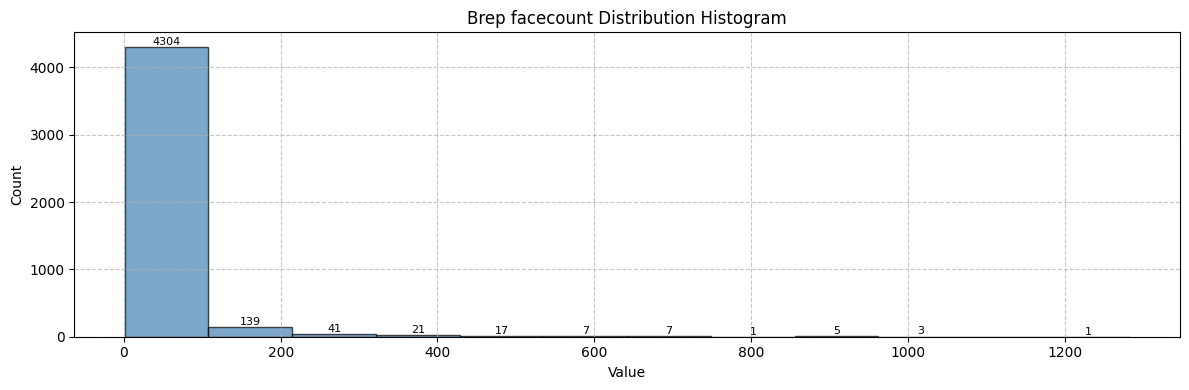

In [6]:
import time
from scripts import helper_tutorials  
start_time = time.time()
dist = explorer.create_distribution(key="num_nodes", bins=12, group="graph")
print(f"Face labels distribution created in {(time.time() - start_time):.2f} seconds\n")
helper_tutorials.print_distribution_info(dist, title="Brep facecount Distribution")

In [7]:
largest_files = dist['file_id_codes_in_bins'][9]

## Dataset Visualization with DatasetViewer

The **DatasetViewer** is a powerful visualization tool that bridges dataset queries and visual analysis. It enables you to quickly visualize query results in two ways:

1. **Image Grids**: Generate collages of PNG previews for rapid visual scanning
2. **Interactive 3D Views**: Open inline 3D viewers for detailed model inspection

In [8]:
# Import the DatasetViewer from the insights module
from hoops_ai.insights import DatasetViewer

dataset_viewer = DatasetViewer.from_explorer(explorer)

In [9]:
# condition
brepcount_is_large = lambda ds: ds['num_nodes'] > 200
filelist = explorer.get_file_list(group="graph", where=brepcount_is_large)
print(len(filelist))

107


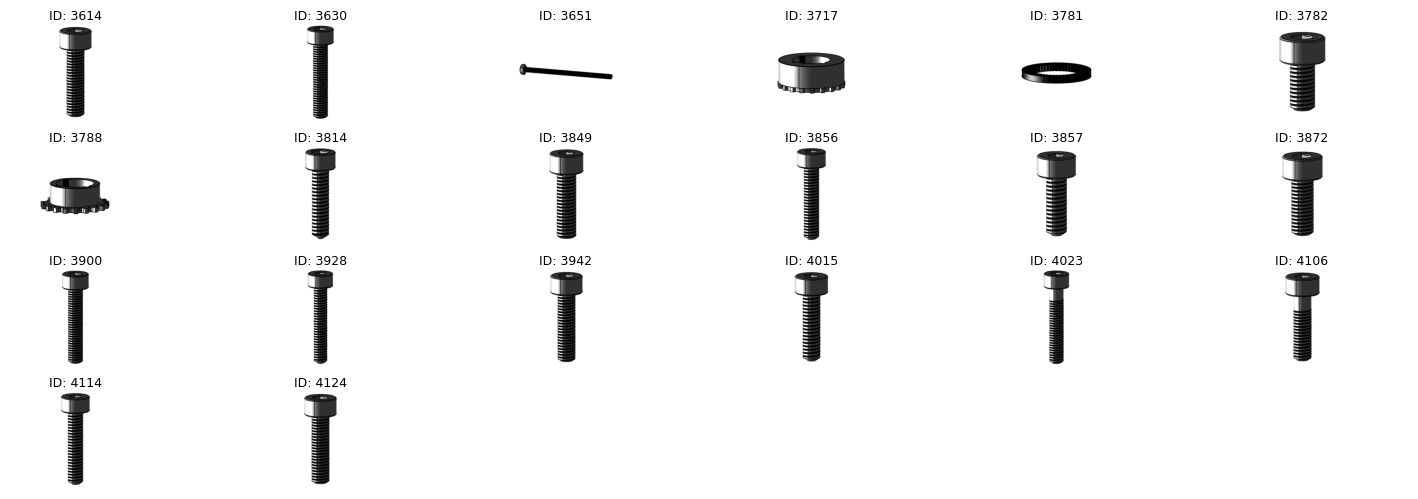

In [10]:
fig = dataset_viewer.show_preview_as_image(filelist[80:100])


Face labels distribution created in 0.31 seconds



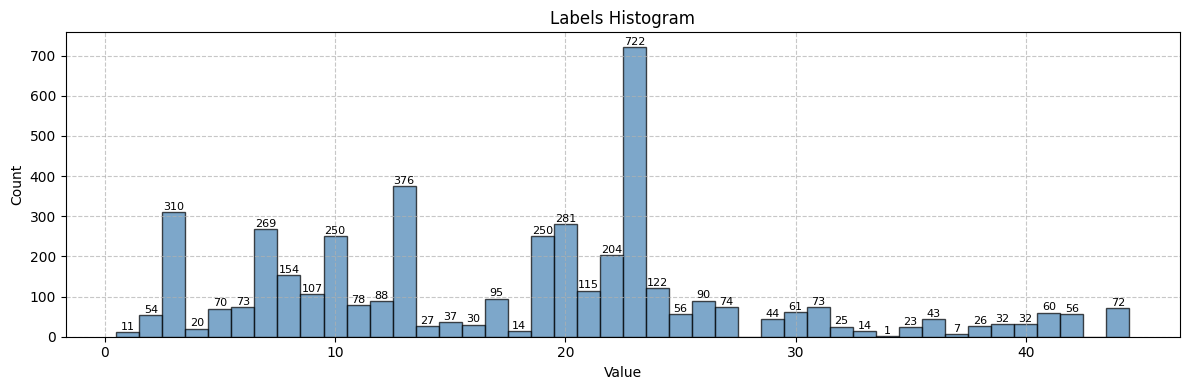

In [11]:
import time
start_time = time.time()
face_dist = explorer.create_distribution(key="part_label", bins=None, group="Labels")
print(f"Face labels distribution created in {(time.time() - start_time):.2f} seconds\n")
helper_tutorials.print_distribution_info(face_dist, title="Labels")


In [12]:
# condition
label_is_pipefittings = lambda ds: ds['part_label'] == 15
filelist = explorer.get_file_list(group="Labels", where=label_is_pipefittings)
print(len(filelist))

37


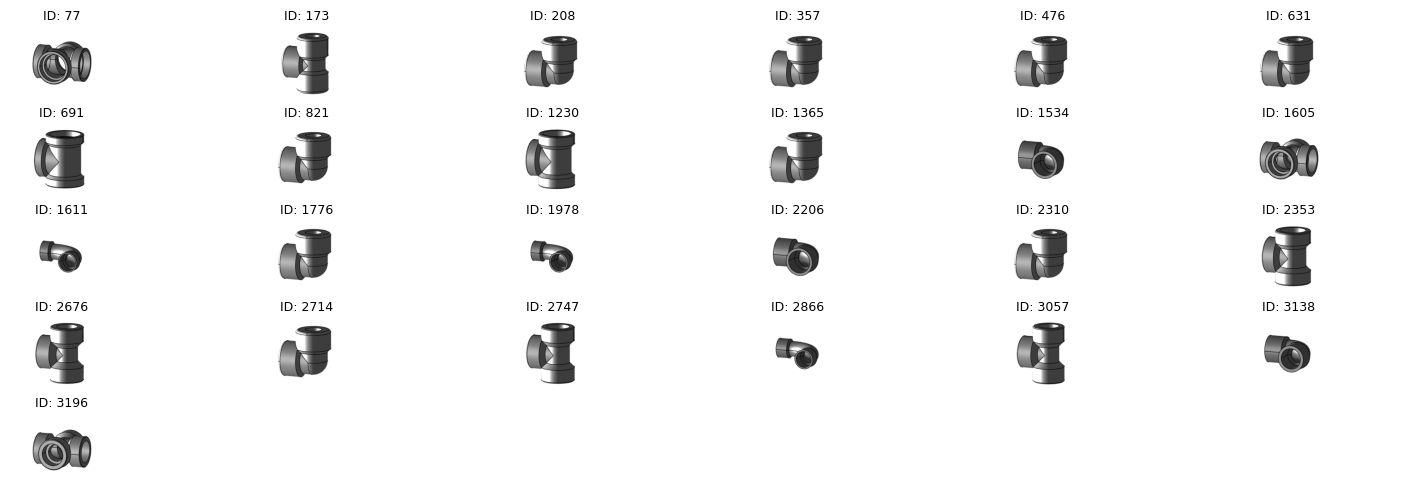

In [13]:
fig = dataset_viewer.show_preview_as_image(filelist[0:36])

In [14]:
# Get and print meta data information
file_id = 33

df_info = explorer.get_parquet_info_by_code(file_id)
print(type(df_info), df_info)

<class 'pandas.core.frame.DataFrame'>                                name  id  \
0  0230531bd60bc2d4e9cd1a1ee5b67020  33   

                                         description  \
0  C:\Users\LuisSalazar\Documents\MAIN\MLProject\...   

                                    stream_cache_png  \
0  C:\Users\LuisSalazar\Documents\MAIN\MLProject\...   

                                     stream_cache_3d subset table_name  
0  C:\Users\LuisSalazar\Documents\MAIN\MLProject\...  train  file_info  


In [15]:
print(explorer.get_descriptions("part_label_description"))

[DatasetExplorer] No records found for part_label_description.
Empty DataFrame
Columns: []
Index: []


Face labels distribution created in 0.37 seconds



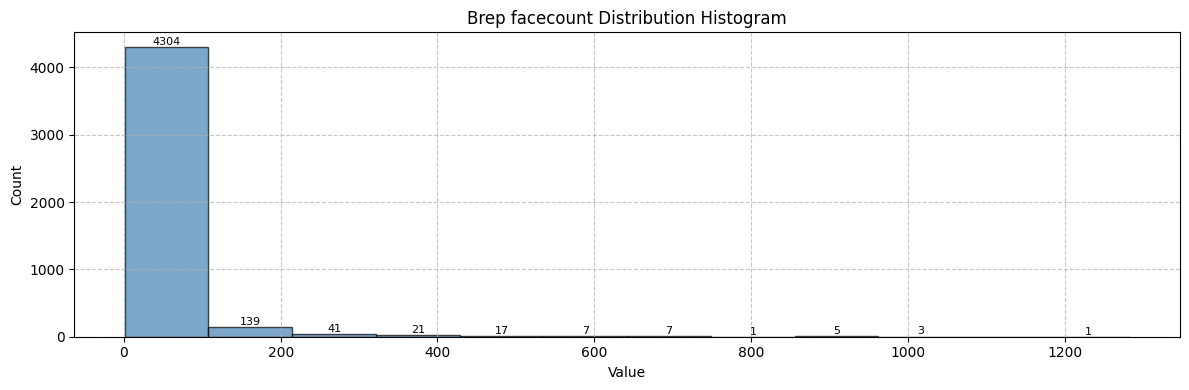

In [16]:
start_time = time.time()
dist = explorer.create_distribution(key="num_nodes", bins=12, group="graph")
print(f"Face labels distribution created in {(time.time() - start_time):.2f} seconds\n")
helper_tutorials.print_distribution_info(dist, title="Brep facecount Distribution")

# Gather files that fulfilled a given condition. Filter

In [17]:
start_time = time.time()

# condition
label_is_pipefittings = lambda ds: ds['part_label'] == 15

filelist = explorer.get_file_list(group="Labels", where=label_is_pipefittings)
print(f"Filtering completed in {(time.time() - start_time):.2f} seconds")
print(f"Found {len(filelist)} files with file_labels == 15 (Pipe Fittings)\n")
print(filelist)

Filtering completed in 0.04 seconds
Found 37 files with file_labels == 15 (Pipe Fittings)

[  77  173  208  357  476  631  691  821 1230 1365 1534 1605 1611 1776
 1978 2206 2310 2353 2676 2714 2747 2866 3057 3138 3196 3213 3282 3300
 3359 3610 3873 3877 3932 4062 4065 4225 4241]


# Query data for single file

In [18]:
def demo_query_single_file(explorer, file_id):
    """Show how to access and query dataset details for a single file."""
    print("=== Single File Dataset Access ===")
    import time
    # Get and print parquet info
    df_info = explorer.get_parquet_info_by_code(file_id)
    print("Files info:")
    for column in df_info.columns:
        print(f"Column: {column}")
        for value in df_info[column]:
            print(f"  {value}")
    print()

    # Access various dataset groups
    groups = ["faces", "Labels", "edges", "graph"]
    datasets = {grp: explorer.file_dataset(file_id_code=file_id, group=grp) for grp in groups}

    print(f"Datasets for file ID '{file_id}':")
    for grp, ds in datasets.items():
        for name, da in ds.data_vars.items():
            print(f"  [{grp}] VARIABLE: {name}, Shape: {da.shape}, Dims: {da.dims}, Size: {da.size}")
    print()

    # Query uv grids data for a specific face
    start_time = time.time()
    uv_grid_data = datasets["faces"]["face_discretization"].isel(face=2)
    print("uv_grids data for face index 2:")
    np_uvgrid = uv_grid_data.data.compute()
    print(f"Query took {(time.time() - start_time):.2f} seconds\n")

In [19]:
demo_query_single_file(explorer,file_id=4500)

=== Single File Dataset Access ===
Files info:
Column: name
  fc60de484998e424494caafa0e286fc3
Column: id
  4500
Column: description
  C:\Users\LuisSalazar\Documents\MAIN\MLProject\repo\HOOPS-AI-tutorials\packages\cadfiles\fabwave\CAD25-45_TOTAL1000\Boxes\STEP\836a504e-ac03-4248-affd-de81643d4191.stp
Column: stream_cache_png
  C:\Users\LuisSalazar\Documents\MAIN\MLProject\repo\HOOPS-AI-tutorials\notebooks\out\flows\ETL_Fabwave_training\stream_cache\fc60de484998e424494caafa0e286fc3.png
Column: stream_cache_3d
  C:\Users\LuisSalazar\Documents\MAIN\MLProject\repo\HOOPS-AI-tutorials\notebooks\out\flows\ETL_Fabwave_training\stream_cache\fc60de484998e424494caafa0e286fc3.scs
Column: subset
  train
Column: table_name
  file_info

Datasets for file ID '4500':
  [faces] VARIABLE: face_areas, Shape: (11,), Dims: ('face',), Size: 11
  [faces] VARIABLE: face_discretization, Shape: (11, 100, 7), Dims: ('face', 'sample', 'component'), Size: 7700
  [faces] VARIABLE: face_indices, Shape: (11,), Dims: (